#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn import linear_model, tree, ensemble
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.preprocessing import StandardScaler

#### Importing processed data table from My-SQL 

In [2]:
import pymysql
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='*****',db='capstone') ## putted ***** in place of actual password after running the code

In [3]:
data=pd.read_sql_query("SELECT * FROM heart_disease_data ",conn)
data.head()

C:\Users\91878\AppData\Local\Temp\ipykernel_13648\2120361030.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data=pd.read_sql_query("SELECT * FROM heart_disease_data ",conn)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,61+
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,31-40
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,41-50
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,51-60
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,51-60


#### Inference: From the dataset, we can check that there are 3 types of data present - continuous, ordinal, and binary.

## Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   cp         303 non-null    int64  
 3   trestbps   303 non-null    int64  
 4   chol       303 non-null    int64  
 5   fbs        303 non-null    int64  
 6   restecg    303 non-null    int64  
 7   thalach    303 non-null    int64  
 8   exang      303 non-null    int64  
 9   oldpeak    303 non-null    float64
 10  slope      303 non-null    int64  
 11  ca         303 non-null    int64  
 12  thal       303 non-null    int64  
 13  target     303 non-null    int64  
 14  age_group  303 non-null    object 
dtypes: float64(1), int64(13), object(1)
memory usage: 35.6+ KB


In [5]:
# Here, we can see that Age-group is showing dtype as object, So let's map these age groups to integer values
data['age_group'].value_counts()

age_group
51-60    129
61+       79
41-50     76
31-40     18
19-30      1
Name: count, dtype: int64

#### Mapping age_group

In [6]:
age_group_mapping = {'19-30': 1, '31-40': 2, '41-50': 3, '51-60': 4, "61+": 5}
data['age_group_integer'] = data['age_group'].map(age_group_mapping)

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,age_group_integer
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,61+,5
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,31-40,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,41-50,3
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,51-60,4
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,51-60,4


In [8]:
## Now, checking the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                303 non-null    int64  
 1   sex                303 non-null    int64  
 2   cp                 303 non-null    int64  
 3   trestbps           303 non-null    int64  
 4   chol               303 non-null    int64  
 5   fbs                303 non-null    int64  
 6   restecg            303 non-null    int64  
 7   thalach            303 non-null    int64  
 8   exang              303 non-null    int64  
 9   oldpeak            303 non-null    float64
 10  slope              303 non-null    int64  
 11  ca                 303 non-null    int64  
 12  thal               303 non-null    int64  
 13  target             303 non-null    int64  
 14  age_group          303 non-null    object 
 15  age_group_integer  303 non-null    int64  
dtypes: float64(1), int64(14), 

In [9]:
#Copying the data for further analysis
df=data.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,age_group_integer
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,61+,5
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,31-40,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,41-50,3
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,51-60,4
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,51-60,4


In [10]:
# dropping the age_group column as we already have mapped integer values to the age-group

df=df.drop('age_group', axis=1)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group_integer
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,5
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,3
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,4
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,4


In [11]:
# Checking for Null values
df.isnull().sum()

age                  0
sex                  0
cp                   0
trestbps             0
chol                 0
fbs                  0
restecg              0
thalach              0
exang                0
oldpeak              0
slope                0
ca                   0
thal                 0
target               0
age_group_integer    0
dtype: int64

In [12]:
df.shape

(303, 15)

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target',
       'age_group_integer'],
      dtype='object')

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group_integer
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,3.881188
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.875953
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,3.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,4.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,5.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,5.000000


#### Inference: Our data does not contain null values and duplicates.

### Correlation Matrix

In [15]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group_integer
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,0.942823
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937,-0.108746
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798,-0.077607
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,0.253143
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,0.229193
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,0.131029
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,-0.114946
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,-0.382341
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,0.102692
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,0.212685


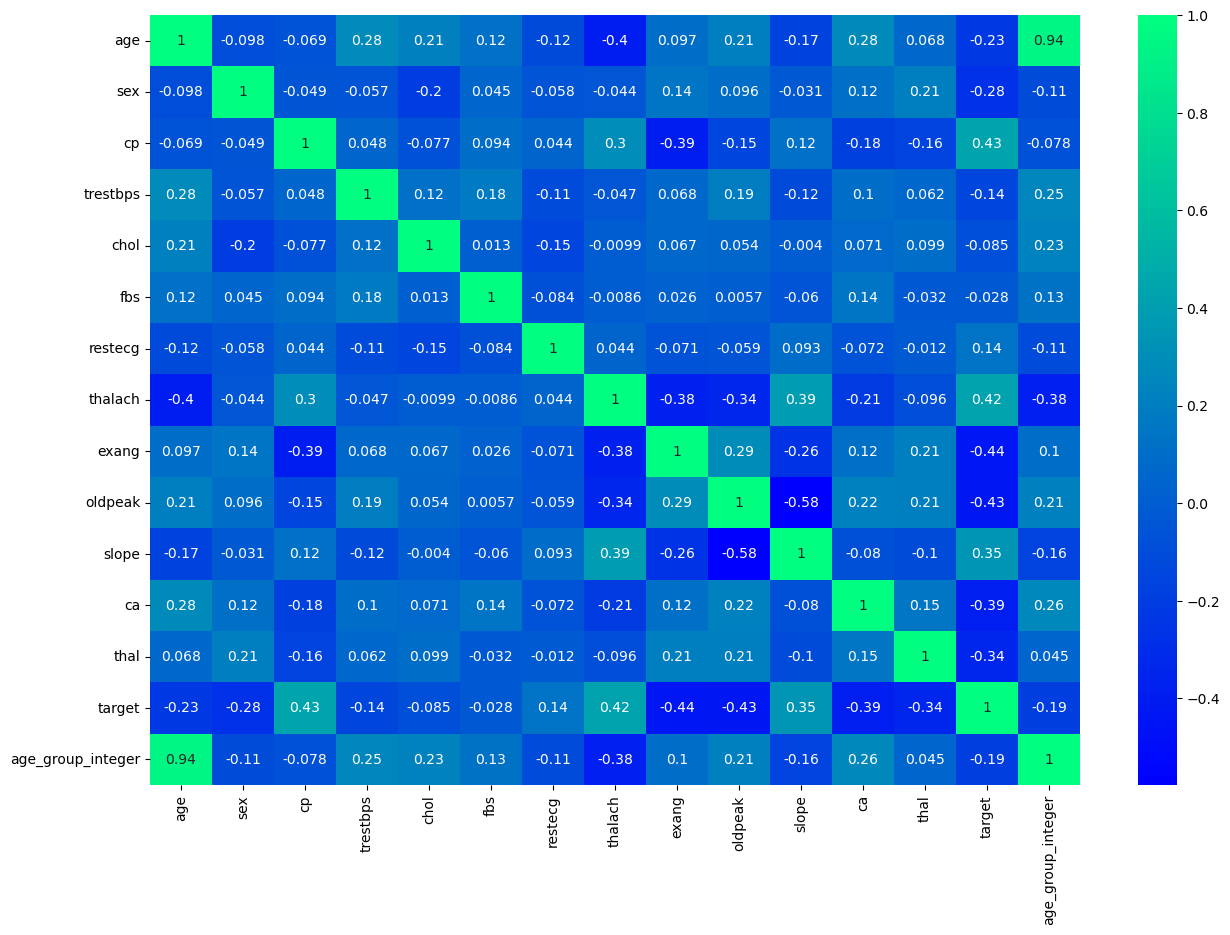

<Figure size 640x480 with 0 Axes>

In [16]:
#Let's Plot this in a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap='winter')
plt.show()
plt.savefig('correlationfigure')

#### Inference: chest pain, thalach, slope, and resting have a positive correlation with the target. It means that whose has a large risk of chest pain results in a greater chance to have heart disease.

exang and the target have a negative correlation which means when we exercise, the heart requires more blood, but narrowed arteries slow down the blood flow. In addition to ca, old peak, thal have a negative correlation with the target.

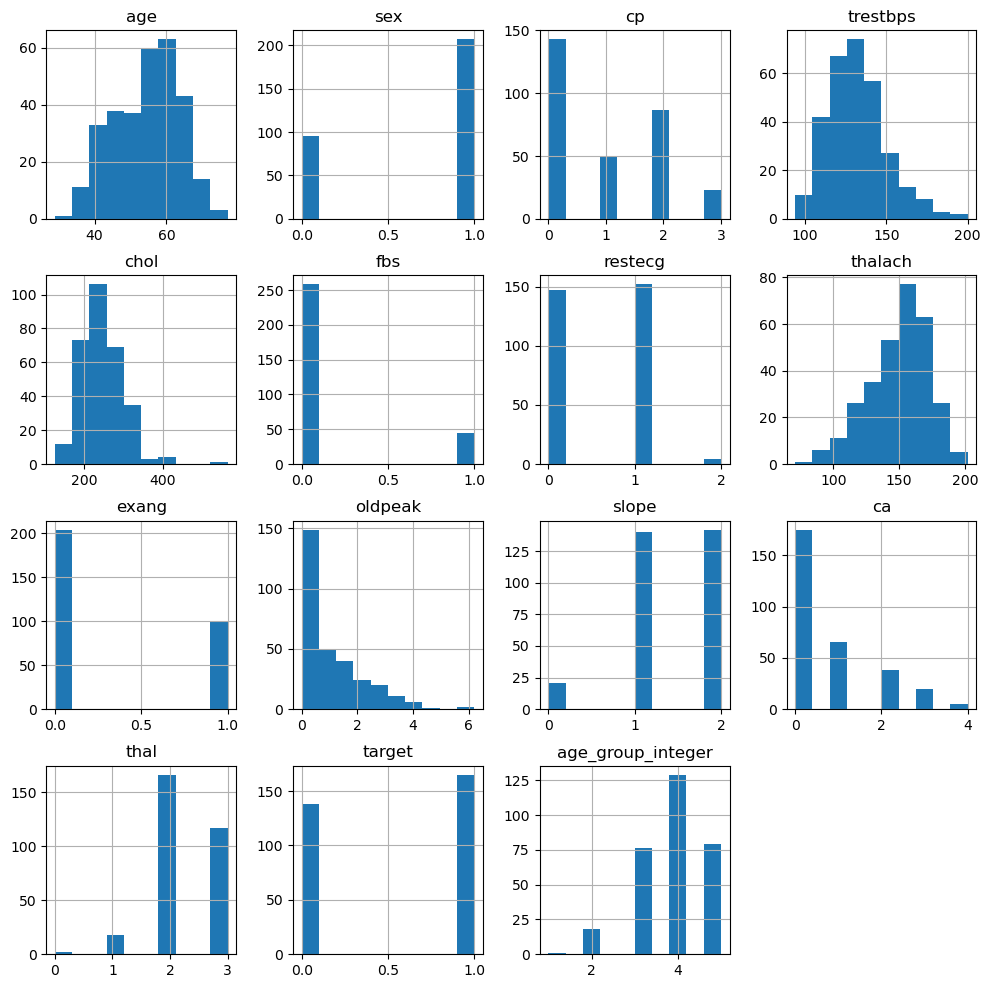

In [17]:
## Relation between each features distribution with the help of histogram.
df.hist(figsize=(12,12))
plt.savefig('histo_plot')

### Train- Test Split

In [18]:
# Creating X (features) and y (target variable)
X = df.drop('target', axis=1)  # Exclude the target column
y = df['target']
def data_prep(df):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=123)
    return X_train,X_test,y_train,y_test

In [19]:
 X_train,X_test,y_train,y_test=data_prep(df)

In [20]:
X_train.shape

(227, 14)

In [21]:
X_test.shape

(76, 14)

#### Scaling the values

In [22]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -0.71442887,
        -2.14887271,  1.27936371],
       [-1.91531289,  0.68100522,  1.00257707, ..., -0.71442887,
        -0.51292188, -2.15114251],
       [-1.47415758, -1.46841752,  0.03203122, ..., -0.71442887,
        -0.51292188, -1.00764044],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ...,  1.24459328,
         1.12302895,  1.27936371],
       [ 0.29046364,  0.68100522, -0.93851463, ...,  0.26508221,
         1.12302895,  0.13586163],
       [ 0.29046364, -1.46841752,  0.03203122, ...,  0.26508221,
        -0.51292188,  0.13586163]])

In [23]:
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [24]:
df_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_group_integer
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1.279364
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,-2.151143
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,-1.007640
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,0.135862
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0.135862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,0.135862
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,-1.007640
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,1.279364
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,0.135862


In [25]:
df_scaled['target']=df['target']
df_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_group_integer,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1.279364,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,-2.151143,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,-1.007640,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,0.135862,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0.135862,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,0.135862,0
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,-1.007640,0
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,1.279364,0
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,0.135862,0


#### Above, we have splitted the dataset into train and test with 75% and 25% data respectively.

## Application of Algorithm into different models

### 1. LOGISTIC REGRESSION MODEL

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)

In [28]:
lg_model = LogisticRegression()
lg_model_fit = lg_model.fit(X_train_scaled,y_train)
pred1= lg_model_fit.predict(X_test_scaled)
pred1

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [29]:
def model_log_diag(y_test,pred1):
    acc = accuracy_score(y_test,pred1)
    prc = precision_score(y_test,pred1)
    clf = classification_report(y_test,pred1)
    conf = confusion_matrix(y_test,pred1)
    return acc, prc,clf,conf

In [30]:
acc, prc,clf,conf = model_log_diag(y_test,pred1)
print("MODEL 1-Logistic Regression Model")
print("--------------------------------------------------")
print("The accuracy score:",acc)
print("--------------------------------------------------")
print("The Classification Report:\n", clf)
print("--------------------------------------------------")
print("The Confusion Matrix:\n",conf)

MODEL 1-Logistic Regression Model
--------------------------------------------------
The accuracy score: 0.8026315789473685
--------------------------------------------------
The Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77        35
           1       0.78      0.88      0.83        41

    accuracy                           0.80        76
   macro avg       0.81      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76

--------------------------------------------------
The Confusion Matrix:
 [[25 10]
 [ 5 36]]


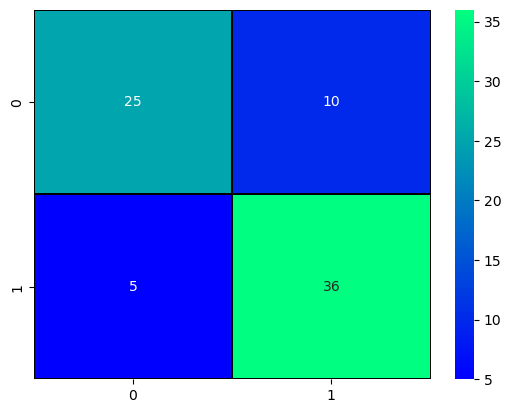

In [50]:
sns.heatmap(conf, annot=True, cmap='winter', linecolor='black', linewidths=0.2)
plt.savefig('log_model_cnf_matrix')

#### Inference: From the above report,  Logistic Regression classifier is giving accuracy score of about 80%.

### 2. DECISION TREE MODEL

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model_clf=DecisionTreeClassifier(max_depth=8,criterion='entropy') ## Create the model
train_model=model_clf.fit(X_train_scaled,y_train) ## Fitting the model
pred2=train_model.predict(X_test_scaled) ## Predicting

In [34]:
pred2

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [35]:
def ds_tree_diag(y_test,pred2):
    acc_ds=accuracy_score(y_test, pred2)
    prc_ds=precision_score(y_test,pred2)
    clf_ds=classification_report(y_test,pred2)
    conf_ds=confusion_matrix(y_test,pred2)
    return acc_ds,clf_ds,conf_ds,prc_ds

In [36]:
acc_ds,clf_ds,conf_ds,prc_ds=ds_tree_diag(y_test,pred2)
print("MODEL 2- Decison Tree Model")
print("--------------------------------------------------")
print("The accuracy score:",acc_ds)
print("--------------------------------------------------")
print("The Classification Report:\n", clf_ds)
print("--------------------------------------------------")
print("The Confusion Matrix:\n",conf_ds)
print("--------------------------------------------------")
print("The Precision Score:\n",prc_ds)

MODEL 2- Decison Tree Model
--------------------------------------------------
The accuracy score: 0.8157894736842105
--------------------------------------------------
The Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.71      0.78        35
           1       0.79      0.90      0.84        41

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76

--------------------------------------------------
The Confusion Matrix:
 [[25 10]
 [ 4 37]]
--------------------------------------------------
The Precision Score:
 0.7872340425531915


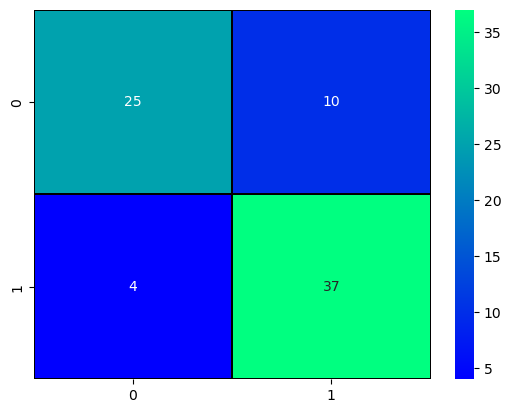

In [51]:
sns.heatmap(conf_ds, annot=True, cmap='winter', linecolor='black', linewidths=0.2)
plt.savefig('dstree_model_cnf_matrix')

#### Inference: From the above report, Decision Tree Model is giving accuracy score of about 81.5%

### 3. RANDOM FOREST CLASSIFIER

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model_rf=RandomForestClassifier(criterion='entropy',max_depth=10, min_samples_split=5)
train_model_3=model_rf.fit(X_train_scaled,y_train)
pred3=train_model_3.predict(X_test_scaled)

In [40]:
pred3

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [41]:
def rndm_tree_diag(y_test,pred3):
    acc_rndm=accuracy_score(y_test, pred3)
    prc_rndm=precision_score(y_test,pred3)
    clf_rndm=classification_report(y_test,pred3)
    conf_rndm=confusion_matrix(y_test,pred3)
    return acc_rndm,clf_rndm,conf_rndm,prc_rndm

In [42]:
acc_rndm,clf_rndm,conf_rndm,prc_rndm=rndm_tree_diag(y_test,pred3)
print("MODEL 3- Random Forest Classifier")
print("--------------------------------------------------")
print("The accuracy score:",acc_rndm)
print("--------------------------------------------------")
print("The Classification Report:\n", clf_rndm)
print("--------------------------------------------------")
print("The Confusion Matrix:\n",conf_rndm)
print("--------------------------------------------------")
print("The Precision Score:\n",prc_rndm)

MODEL 3- Random Forest Classifier
--------------------------------------------------
The accuracy score: 0.881578947368421
--------------------------------------------------
The Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76

--------------------------------------------------
The Confusion Matrix:
 [[30  5]
 [ 4 37]]
--------------------------------------------------
The Precision Score:
 0.8809523809523809


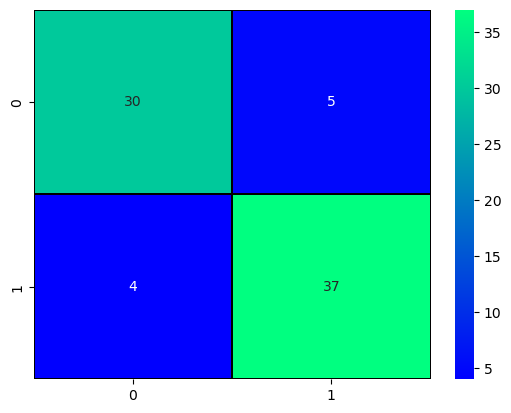

In [52]:
sns.heatmap(conf_rndm, annot=True, cmap='winter', linecolor='black', linewidths=0.2)
plt.savefig('rndm_fst_cnf_matrix')

#### Inference: From the above report, Random Forest Classifier is giving accuracy score of about 88%

### 4- SUPPORT VECTOR MACHINES (SVM)

In [44]:
from sklearn.svm import SVC

In [45]:
model_svm=SVC(kernel='linear')
model_train_4=model_svm.fit(X_train_scaled,y_train)
pred4=model_train_4.predict(X_test_scaled)

In [46]:
pred4

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [47]:
def svm_diag(y_test,pred4):
    acc_svm=accuracy_score(y_test, pred4)
    prc_svm=precision_score(y_test,pred4)
    clf_svm=classification_report(y_test,pred4)
    conf_svm=confusion_matrix(y_test,pred4)
    return acc_svm,clf_svm,conf_svm,prc_svm

In [48]:
acc_svm,clf_svm,conf_svm,prc_svm=svm_diag(y_test,pred4)
print("MODEL 4- Support Vector Machines")
print("--------------------------------------------------")
print("The accuracy score:",acc_svm)
print("--------------------------------------------------")
print("The Classification Report:\n", clf_svm)
print("--------------------------------------------------")
print("The Confusion Matrix:\n",conf_svm)
print("--------------------------------------------------")
print("The Precision Score:\n",prc_svm)

MODEL 4- Support Vector Machines
--------------------------------------------------
The accuracy score: 0.7894736842105263
--------------------------------------------------
The Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76        35
           1       0.78      0.85      0.81        41

    accuracy                           0.79        76
   macro avg       0.79      0.78      0.79        76
weighted avg       0.79      0.79      0.79        76

--------------------------------------------------
The Confusion Matrix:
 [[25 10]
 [ 6 35]]
--------------------------------------------------
The Precision Score:
 0.7777777777777778


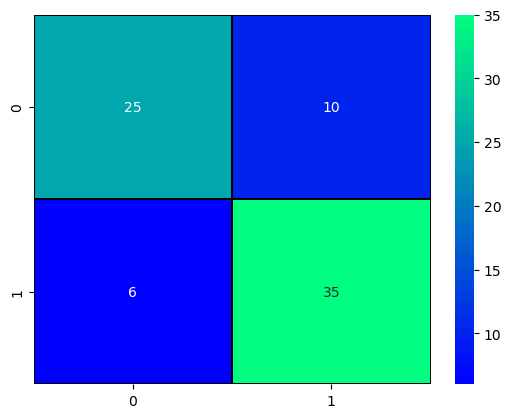

In [53]:
sns.heatmap(conf_svm, annot=True, cmap='winter', linecolor='black', linewidths=0.2)
plt.savefig('svm_model_cnf_matrix')

#### Inference: From the above report, Support Vector Machines is giving accuracy score of about 79%

### CONCLUSION

### Based on the outcomes obtained from our evaluation of four machine learning algorithms—Logistic Regression, Random Forest, Support Vector Machines, and Decision Trees—we observed that Logistic Regression achieved an accuracy of 80%,Decision Tree achieved 81.5%, Support Vector Machines exhibited an accuracy of 79%, and Random Forest outperformed the others with an impressive accuracy of 88%. Consequently, we can infer that the Random Forest algorithm proves to be the most effective for our model, demonstrating the highest accuracy of 88%